In [21]:
from obspy.clients.iris import Client
%matplotlib inline

client = Client()
result = client.traveltime(evloc=(-36.122,-72.898),
    staloc=[(-33.45,-70.67),(47.61,-122.33),(35.69,139.69)],
    evdepth=22.9)

In [22]:
print(result.decode()) 

Model: iasp91
Distance   Depth   Phase   Travel    Ray Param  Takeoff  Incident  Purist    Purist
  (deg)     (km)   Name    Time (s)  p (s/deg)   (deg)    (deg)   Distance   Name 
-----------------------------------------------------------------------------------
    3.24    22.9   P         49.39    13.750     53.77    45.82     3.24   = P
    3.24    22.9   Pn        49.40    13.754     53.80    45.84     3.24   = Pn
    3.24    22.9   P         56.77    17.043     89.08    62.75     3.24   = P
    3.24    22.9   P         56.90    16.969     84.58    62.27     3.24   = P
    3.24    22.9   S         87.99    24.724     56.81    48.34     3.24   = S
    3.24    22.9   Sn        88.00    24.739     56.86    48.38     3.24   = Sn
    3.24    22.9   S         98.35    29.542     89.08    63.21     3.24   = S
    3.24    22.9   S         98.57    29.413     84.57    62.72     3.24   = S
    3.24    22.9   PcP      507.88     0.311      1.05     0.93     3.24   = PcP
    3.24    22.9   S

In [23]:
result = client.distaz(stalat=-12.81, stalon=45.01, evtlat=23.86,evtlon=120.37)

In [24]:
print(result)

{'ellipsoidname': 'WGS84', 'distance': 82.37021, 'distancemeters': 9140122.54567, 'backazimuth': 63.40718, 'azimuth': 252.37765}


In [25]:
code, region = client.flinnengdahl(lat=-12.81, lon=45.01)

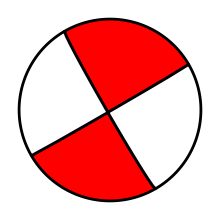

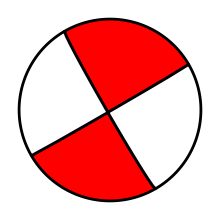

In [26]:
from obspy.imaging.beachball import beachball
mt2 = [150, 87, 1]
beachball(mt2, size=200, linewidth=2, facecolor='r')

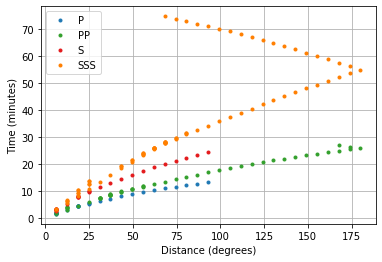

In [27]:
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = plot_travel_times(source_depth=10, ax=ax, fig=fig,phase_list=['P', 'PP', 'S','SSS'], npoints=30)

In [28]:
plot_travel_times

<function obspy.taup.tau.plot_travel_times(source_depth, phase_list=('ttbasic',), min_degrees=0, max_degrees=180, npoints=50, model='iasp91', plot_all=True, legend=True, verbose=False, fig=None, ax=None, show=True)>

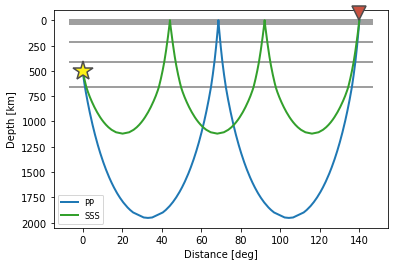

In [29]:
from obspy.taup import TauPyModel

model = TauPyModel(model='iasp91')
arrivals = model.get_ray_paths(500, 140, phase_list=['PP', 'SSS'])
arrivals.plot_rays(plot_type='cartesian', phase_list=['PP', 'SSS'],plot_all=False, legend=True)

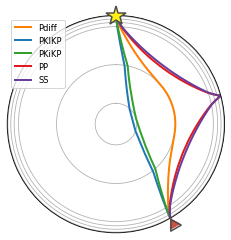

In [43]:
from obspy.taup import TauPyModel
model = TauPyModel(model='iasp91')
source_depth = 60
epicenter_distance = 150
arrivals = model.get_ray_paths(source_depth, epicenter_distance, phase_list=['Pdiff', 'SS', 'PKIKP','PP','PKiKP'])
arrivals.plot_rays(plot_type='spherical', phase_list=['Pdiff', 'SS', 'PKIKP','PP','PKiKP'],legend=True)
#Pdiff:P波在地函邊界繞射
#SS:S波穿過地函在地表反射一次
#PKIKP:P波穿過地函,P波穿過外地核,P波穿過內地核,P波穿過外地核,P波穿過地函
#PP:P波穿過地函在地表反射一次
#PKiKP:P波穿過地函,P波穿過外地核,P波在外地核邊界反射,P波穿過外地核,P波穿過地函